# ARMA predictions of artificial data

In [1]:
%matplotlib inline

In [2]:
# !pip install -U statsmodels

In [3]:
import statsmodels.api

In [4]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

Generate artificial data from an (2,2) ARMA process: $x_t = a_1 x_{t-1} + a_2 x_{t-2} + b_1 n_{t-1} + b_2 n_{t-2}$

In [5]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [6]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]

In [7]:
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

The artificial data sample have been generated, now we will fit the model. First we set pandas series object:

In [8]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)

And now for a nice model fitting (remember we are cheating here). The option trend='c' (trend='nc' in this case) is used to include a constant or not in the fitting. The option disp=-1 is just to avoid showing convergence information which is mainly for test purposes.

In [9]:
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

/home/javier/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [10]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -353.445
Method:                       css-mle   S.D. of innovations              0.990
Date:                Wed, 06 Nov 2019   AIC                            716.891
Time:                        18:47:39   BIC                            734.498
Sample:                    01-31-1980   HQIC                           723.977
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7904      0.134      5.878      0.000       0.527       1.054
ar.L2.y       -0.2314      0.113     -2.044      0.042      -0.453      -0.009
ma.L1.y        0.7007      0.127      5.525      0.0

In [11]:
y.tail()

2000-06-30    0.173211
2000-07-31   -0.048325
2000-08-31   -0.415804
2000-09-30    0.338725
2000-10-31    0.360838
dtype: float64

In [12]:
pred = arma_res.predict(start='2000-06-30', end='2000-10-31')

In [13]:
pred

2000-06-30    1.290049
2000-07-31   -0.462531
2000-08-31   -0.241561
2000-09-30   -0.271383
2000-10-31    0.720726
Freq: M, dtype: float64

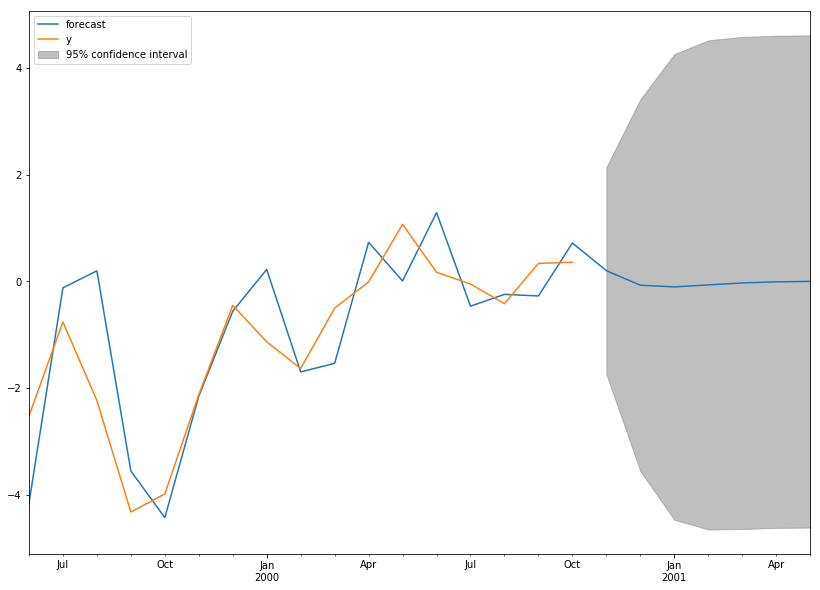

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,10))
fig = arma_res.plot_predict(start='1999-06-30', end='2001-05-31', ax=ax)
legend = ax.legend(loc='upper left')

In the next practice we will see how to predict real data and how to estimate the orders since we won't be able to cheat any more with real data.